In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.read_csv('two_classes.csv')

,x1,x2,y
0,2.164064,-1.012114,0
1,1.947562,-1.913494,0
2,-0.860753,-1.089006,1
3,2.530348,0.040822,0
4,1.014954,2.798955,0
...,...,...,...
995,2.664896,-1.955326,0
996,-2.019928,0.334542,1
997,-4.634470,0.300158,1
998,1.426275,-2.765590,0


In [3]:
df=pd.read_csv('two_classes.csv')
df.tail()

,x1,x2,y
995,2.664896,-1.955326,0
996,-2.019928,0.334542,1
997,-4.634470,0.300158,1
998,1.426275,-2.765590,0
999,1.988053,1.466494,0


In [4]:
df_positive = df[df['y']>0]
df_negative = df[df['y']==0]

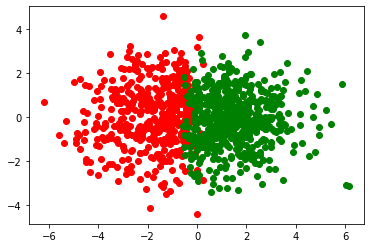

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')
plt.show()

In [10]:
from sklearn.svm import LinearSVC
X = df[['x1', 'x2']].to_numpy()

In [13]:
y = df['y'].to_numpy()

In [14]:
print(y)

[0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1
 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1
 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0
 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0
 0 1 0 0 1 1 0 0 1 0 0 1 

In [15]:
print(X)

[[ 2.16406412 -1.01211398]
 [ 1.94756217 -1.91349424]
 [-0.86075316 -1.08900649]
 ...
 [-4.63447011  0.3001577 ]
 [ 1.42627548 -2.76559042]
 [ 1.98805335  1.46649433]]


In [16]:
svm_simple = LinearSVC(C=1, loss='hinge')

In [17]:
svm_simple.fit(X=X, y=y)

LinearSVC(C=1, loss='hinge')

In [18]:
svm_simple.predict(X=[[0.12, 0.56], [-4, 40], [0,40], [5, 20]])

array([0, 1, 1, 0], dtype=int64)

In [19]:
#!pip install yellowbrick

In [22]:
from yellowbrick.contrib.classifier import DecisionViz

In [23]:
viz = DecisionViz(svm_simple, title='Linear SCM')

In [25]:
viz.fit(X=X, y=y)
viz.draw(X=X, y=y)
viz.show()

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

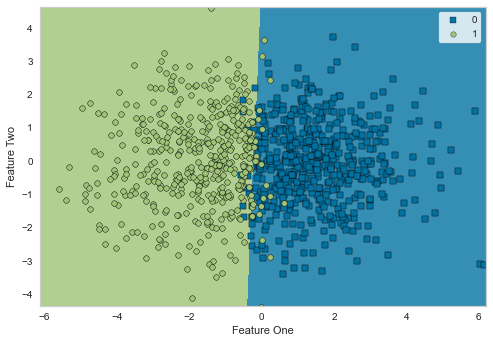

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [26]:
viz = DecisionViz(svm_simple, title='Linear SVM')
viz.fit(X=X, y=y)
viz.draw(X=X, y=y)
viz.show()

In [27]:
# PipeLine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
svm_std = Pipeline([("std", StandardScaler()), ("lsvm", LinearSVC(C=1, loss='hinge'))])
svm_std.fit(X=X, y=y)

C:\Users\user\anaconda3\envs\iotsensor\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


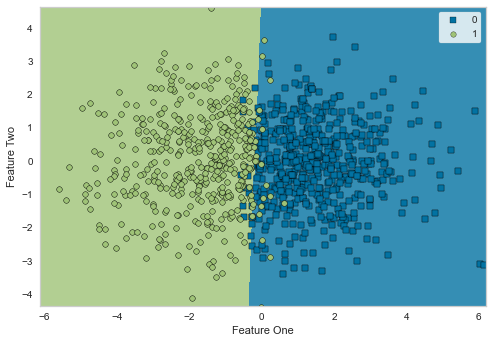

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [28]:
viz = DecisionViz(svm_std, title='Standardization SVM')
viz.fit(X=X, y=y)
viz.draw(X=X, y=y)
viz.show()

In [29]:
df = pd.read_csv('twisted_data.csv')

In [31]:
print(df.tail())

           x1        x2  y
995  1.112475 -0.180790  0
996 -2.544258 -0.559755  0
997 -1.044663  0.164435  1
998 -1.475026 -0.683385  0
999  1.860988  0.728986  1


In [32]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.contrib.classifier import DecisionViz

In [33]:
X = df[['x1','x2']].to_numpy()

In [34]:
y = df['y'].to_numpy()

In [37]:
polymonial_svm_clf = Pipeline(steps=[("scaler", StandardScaler()), ("svm_clf", SVC(C=10, kernel='poly', degree=4, coef0=2))])

In [38]:
polymonial_svm_clf.fit(X=X, y=y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, coef0=2, degree=4, kernel='poly'))])

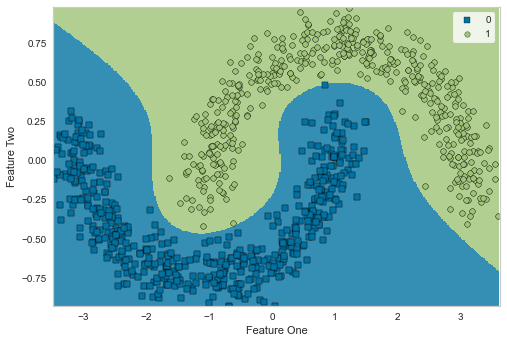

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [39]:
viz = DecisionViz(estimator=polymonial_svm_clf, title='Polymonial Feature SCM')
viz.fit(X=X,y=y)
viz.draw(X=X, y=y)
viz.show()

In [40]:
df_positive = df[df['y']>0]
df_negative = df[df['y'] == 0]

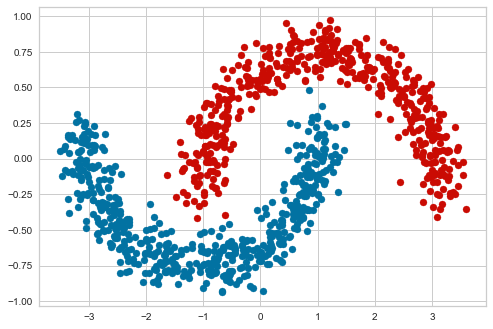

In [41]:
plt.scatter(x=df_positive['x1'], y=df_positive['x2'], color='r')
plt.scatter(x=df_negative['x1'], y=df_negative['x2'], color='b')

In [62]:
# 퍼셉트론
# AND 게이트

import numpy as np

epsilon = 0.0000001

def step_func(t):
    if t>epsilon:
        return 1
    else:
        return 0
    
X = np.array([
    [0,0,1],    
    [0,1,1],    # 맨끝의 1은 bias
    [1,0,1],
    [1,1,1]])

y = np.array([0,0,0,1])
W = np.zeros(len(X[0]))

In [63]:
def perceptron_fit(X, Y, epochs=10):   # 퍼셉트론 학습 알고리즘 구현
    global W
    eta = 0.2                           # 학습률
    
    for t in range(epochs):
        print("epoch=", t, "================")
        for i in range(len(X)):
            predict = step_func(np.dot(X[i],W))
            error = Y[i] - predict              # 오차 계산
            W += eta * error * X[i]             # 가중치 업데이트
            print("현재 처리 입력=", X[i], "정답=", Y[i], "출력", predict, "변경된 가중치=", W)
        print("==================================================================")


In [64]:
def perceptron_predict(X):           #예측
    global W
    for x in X:
        print(x[0], x[1], "->", step_func(np.dot(x, W)))
perceptron_fit(X, y, 6)
perceptron_predict(X)

epoch= 0 ================
현재 처리 입력= [0 0 1] 정답= 0 출력 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [0 1 1] 정답= 0 출력 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [1 0 1] 정답= 0 출력 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [1 1 1] 정답= 1 출력 0 변경된 가중치= [0.2 0.2 0.2]
epoch= 1 ================
현재 처리 입력= [0 0 1] 정답= 0 출력 1 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 0 출력 1 변경된 가중치= [ 0.2  0.  -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력 0 변경된 가중치= [ 0.2  0.  -0.2]
현재 처리 입력= [1 1 1] 정답= 1 출력 0 변경된 가중치= [0.4 0.2 0. ]
epoch= 2 ================
현재 처리 입력= [0 0 1] 정답= 0 출력 0 변경된 가중치= [0.4 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 0 출력 1 변경된 가중치= [ 0.4  0.  -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력 1 변경된 가중치= [ 0.2  0.  -0.4]
현재 처리 입력= [1 1 1] 정답= 1 출력 0 변경된 가중치= [ 0.4  0.2 -0.2]
epoch= 3 ================
현재 처리 입력= [0 0 1] 정답= 0 출력 0 변경된 가중치= [ 0.4  0.2 -0.2]
현재 처리 입력= [0 1 1] 정답= 0 출력 0 변경된 가중치= [ 0.4  0.2 -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력 1 변경된 가중치= [ 0.2  0.2 -0.4]
현재 처리 입력= [1 1 1] 정답= 1 출력 0 변경된 가중치= [ 0.4  0.4 -0.2]
epoch= 4 ================
현재 처리 입력= [0 0 1] 정답

In [65]:
# 퍼셉트론
# OR 게이트

import numpy as np

epsilon = 0.0000001

def step_func(t):
    if t>epsilon:
        return 1
    else:
        return 0
    
X = np.array([
    [0,0,1],    
    [0,1,1],    # 맨끝의 1은 bias
    [1,0,1],
    [1,1,1]])

y = np.array([0,1,1,1])    # 정답
W = np.zeros(len(X[0]))

In [66]:
def perceptron_fit(X, Y, epochs=10):
    global W
    eta = 0.2
    
    for t in range(epochs):
        print("epoch=", t, "================")
        for i in range(len(X)):
            predict = step_func(np.dot(X[i],W))
            error = Y[i] - predict
            W += eta * error * X[i]
            print("현재 처리 입력=", X[i], "정답=", Y[i], "출력", predict, "변경된 가중치=", W)
        print("==================================================================")


In [67]:
def perceptron_predict(X):
    global W
    for x in X:
        print(x[0], x[1], "->", step_func(np.dot(x, W)))
perceptron_fit(X, y, 6)
perceptron_predict(X)

epoch= 0 ================
현재 처리 입력= [0 0 1] 정답= 0 출력 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [0 1 1] 정답= 1 출력 0 변경된 가중치= [0.  0.2 0.2]
현재 처리 입력= [1 0 1] 정답= 1 출력 1 변경된 가중치= [0.  0.2 0.2]
현재 처리 입력= [1 1 1] 정답= 1 출력 1 변경된 가중치= [0.  0.2 0.2]
epoch= 1 ================
현재 처리 입력= [0 0 1] 정답= 0 출력 1 변경된 가중치= [0.  0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 1 출력 1 변경된 가중치= [0.  0.2 0. ]
현재 처리 입력= [1 0 1] 정답= 1 출력 0 변경된 가중치= [0.2 0.2 0.2]
현재 처리 입력= [1 1 1] 정답= 1 출력 1 변경된 가중치= [0.2 0.2 0.2]
epoch= 2 ================
현재 처리 입력= [0 0 1] 정답= 0 출력 1 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 1 출력 1 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [1 0 1] 정답= 1 출력 1 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [1 1 1] 정답= 1 출력 1 변경된 가중치= [0.2 0.2 0. ]
epoch= 3 ================
현재 처리 입력= [0 0 1] 정답= 0 출력 0 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 1 출력 1 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [1 0 1] 정답= 1 출력 1 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [1 1 1] 정답= 1 출력 1 변경된 가중치= [0.2 0.2 0. ]
epoch= 4 ================
현재 처리 입력= [0 0 1] 정답= 0 출력 0 변경된 가중치= [0.